In [214]:
# notebook for visualizing plane MILP results

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import clear_output

In [271]:
!rm ./files/b-inv.txt
!python3 ./b-inv-part/main.py ./files/plane.lp >> ./files/b-inv.txt

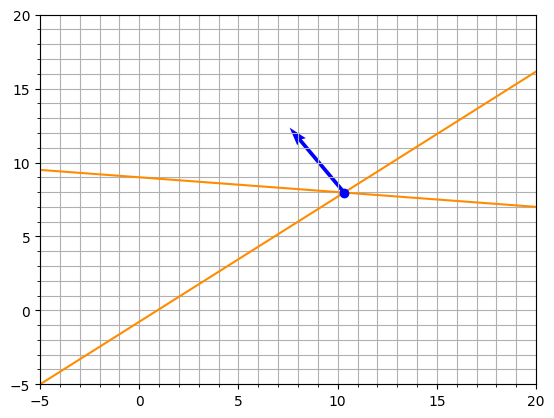

In [272]:
from pysmps import smps_loader as mps
from pyscipopt import LP


signs = mps.load_mps("./files/plane.mps")[5]
obj = mps.load_mps("./files/plane.mps")[6]
a_matrix = mps.load_mps("./files/plane.mps")[7]
rhs = mps.load_mps("./files/plane.mps")[9]['RHS']

constraints = zip(signs, a_matrix, rhs)

x = np.array([-10 + 0.1 * i for i in range(0, 1001)])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(which='both', clip_on=False)
ax.set_ylim(-5, 20)
ax.set_xlim(-5, 20)

major_ticks = np.arange(-5, 21, 5)
minor_ticks = np.arange(-4, 21, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

for sign, row, rhs in constraints:
    y = (rhs - row[0] * x) / row[1]
    ax.plot(x, y, 'darkorange')

lp = LP()
lp.readLP(b"./files/plane.mps")
lp.solve()
x_r, y_r = lp.getPrimal()

ax.plot(x_r, y_r, 'ob')

V = np.array(-obj)
origin = np.array([[x_r],[y_r]])

ax.quiver(*origin, V[0], V[1], color=['b'], scale=100, clip_on=False)

plt.show()

In [277]:
from pyscipopt import Model

milp = Model()
milp.readProblem("./files/plane.lp")
milp.optimize()
milp.writeSol("./files/plane-sol.txt")

original problem has 2 variables (0 bin, 2 int, 0 impl, 0 cont) and 2 constraints
presolving:
(round 1, fast)       1 del vars, 1 del conss, 0 add conss, 4 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 2, fast)       1 del vars, 2 del conss, 0 add conss, 5 chg bounds, 1 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
presolving (3 rounds: 3 fast, 1 medium, 1 exhaustive):
 2 deleted vars, 2 deleted constraints, 0 added constraints, 5 tightened bounds, 0 added holes, 1 changed sides, 0 changed coefficients
 0 implications, 0 cliques
transformed 1/1 original solutions to the transformed problem space
Presolving Time: 0.00

SCIP Status        : problem is solved [optimal solution found]
Solving Time (sec) : 0.00
Solving Nodes      : 0
Primal Bound       : +1.28300000000000e+02 (1 solutions)
Dual Bound         : +1.28300000000000e+02
Gap                : 0.00 %


TypeError: Argument 'solution' has incorrect type (expected pyscipopt.scip.Solution, got str)

In [274]:
# lol
milp_sol_x, milp_sol_y = np.array(list(eval(str(milp.getBestSol())).values()))

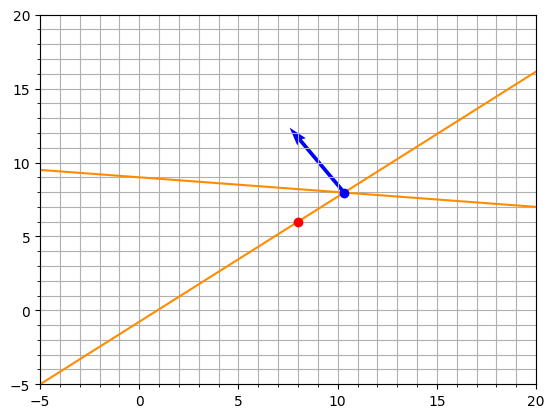

In [275]:
ax.plot(milp_sol_x, milp_sol_y, 'ro')
fig